In [2]:
# import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy 
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Unzip the zip coordinates using a For loop.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-66.7648886014641 57.69546106076848
-55.4243349332293 -68.06916223043334
60.693349154357946 -154.40221266017605
-65.37029965092661 -7.05029065290816
-65.07403104052804 -99.99102684064869
55.02996206986586 53.71799574115471
46.1499154465489 131.0932435106111
3.5452617219815323 26.956145923167753
-33.0220021634633 -56.937154924691384
33.11618706188921 78.81027259924934
-78.7224393714758 33.76030547082593
-77.17393561604028 -167.35177946007835
65.86506702964653 -131.00446223947378
8.126013749214323 38.39478003656319
43.35851102968161 -117.36778642235
82.63788904053746 134.89682213968922
29.61864208901271 -58.76307283204123
-12.608172609618407 -37.26006518074226
7.693788372543054 -120.88668895012981
32.31068648615184 -10.56546922711999
34.329916893958796 51.55350615238302
36.25835904305637 113.11867369353757
20.607343350705335 -132.65771734723106
22.88582285123141 -75.71547273433421
69.41010958439477 83.71033814546422
84.75757530438608 -50.710604619273084
-82.26762516919503 -177.8917394292

17.05644727777448 47.56070638146994
-31.166325556328616 -112.8563174524983
13.086552726442292 160.65443810021947
34.119218857589516 -158.22522010209894
-42.15695835078402 152.9486506227949
24.822379220899492 -125.05950411836595
35.62672561892434 108.41621122992836
79.23016685751324 1.97432862372645
-3.464496494696462 7.862701941998239
-81.22726649303029 175.3723731304476
-84.41824925283063 147.3302232889102
-15.5761434809326 67.62586255109358
3.1078323795278493 -13.161630694947235
-67.18775960602176 -71.29643157423732
63.568319932105084 -161.46302910944755
-63.26506420980671 87.32849318228614
67.26948087596057 144.12166741904758
-40.863091037066 112.78599193059875
-77.86925024436735 -32.21307938071189
-39.25962413504339 -165.863384526397
-15.272974389656909 -5.137533851494823
-35.26079295222968 161.96480205043633
-43.880192887005904 -133.69803949723206
-46.02889506634758 89.44291319453475
47.29862231471114 -131.6804783413511
-27.629181127531844 -8.295722519187052
-63.97872432276795 69.

12.070358839901004 12.569713389541562
29.85387387787536 -171.3359368024681
87.81515195125968 -161.5917709730863
68.0620278091086 29.7937089363879
14.92885729157318 48.385703297216935
-88.92055140969265 42.25381442726271
-16.062278181340147 58.772248869299744
-23.094903203985638 -91.74091072317556
63.8086350692613 -82.796294145907
38.256258125551426 -32.59328846345497
-53.560439678998854 42.46054809547667
84.72180719168514 -50.12935391085372
48.645834617349266 -107.79560980531024
-58.07218294209092 23.286857130009764
-34.29333722346671 -110.96899257489088
-12.87626218095886 6.016485007360387
84.95252383369146 120.174438067214
-56.893567094635486 48.12635589490219
-33.83128626472302 131.53860548211486
39.21532533725855 56.647975176136214
48.77710003117056 -135.11704758333565
-89.98542642207023 29.631472730255666
-55.882887302399084 -0.10004490340719485
64.7390666980551 129.93371950891157
20.435431540548095 84.0175222836765
81.44928251595496 94.50032561975797
24.336466702527744 -164.85126

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list; introducing "enumerate()"
# to reference both index "i" and the "city" in 1 for-loop - avoid 2 for-loops
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    # removing the blank spaces in the city name and concatenating the city name 
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | homer
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | bakaly
Processing Record 7 of Set 1 | lingdong
Processing Record 8 of Set 1 | isiro
Processing Record 9 of Set 1 | paso de los toros
Processing Record 10 of Set 1 | leh
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | inuvik
Processing Record 14 of Set 1 | butajira
Processing Record 15 of Set 1 | caldwell
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | saint george
Processing Record 18 of Set 1 | conde
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | asfi
Processing Record 21 of Set 1 | kashan
Processing Record 22 of Set 1 | jiaozuo
Processing Record 23 of Set 1 | lompoc
Proces

Processing Record 36 of Set 4 | outlook
Processing Record 37 of Set 4 | redding
Processing Record 38 of Set 4 | lishu
Processing Record 39 of Set 4 | kanniyakumari
Processing Record 40 of Set 4 | kashi
Processing Record 41 of Set 4 | khatanga
Processing Record 42 of Set 4 | ilhabela
Processing Record 43 of Set 4 | bathsheba
Processing Record 44 of Set 4 | santa cruz
Processing Record 45 of Set 4 | onokhoy
Processing Record 46 of Set 4 | thinadhoo
Processing Record 47 of Set 4 | rio verde de mato grosso
Processing Record 48 of Set 4 | iqaluit
Processing Record 49 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 50 of Set 4 | ust-maya
Processing Record 1 of Set 5 | bauchi
Processing Record 2 of Set 5 | coronel
Processing Record 3 of Set 5 | balakhninskiy
Processing Record 4 of Set 5 | chegdomyn
Processing Record 5 of Set 5 | andenes
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | chagda
City not found. Skipping...
Processing Record 8 of Se

Processing Record 24 of Set 8 | khonuu
City not found. Skipping...
Processing Record 25 of Set 8 | port macquarie
Processing Record 26 of Set 8 | taicheng
Processing Record 27 of Set 8 | bali
Processing Record 28 of Set 8 | vozhd proletariata
City not found. Skipping...
Processing Record 29 of Set 8 | price
Processing Record 30 of Set 8 | massakory
Processing Record 31 of Set 8 | alice springs
Processing Record 32 of Set 8 | carolina
Processing Record 33 of Set 8 | kaduna
Processing Record 34 of Set 8 | nouadhibou
Processing Record 35 of Set 8 | miraflores
Processing Record 36 of Set 8 | tomaszow lubelski
Processing Record 37 of Set 8 | maumere
Processing Record 38 of Set 8 | panguna
Processing Record 39 of Set 8 | port augusta
Processing Record 40 of Set 8 | venado tuerto
Processing Record 41 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 42 of Set 8 | cockburn town
Processing Record 43 of Set 8 | karamea
City not found. Skipping...
Processing Record 44 of Set 8 | a

Processing Record 10 of Set 12 | marsa matruh
Processing Record 11 of Set 12 | porto walter
Processing Record 12 of Set 12 | san juan
Processing Record 13 of Set 12 | dongzhen
Processing Record 14 of Set 12 | north myrtle beach
Processing Record 15 of Set 12 | olga
Processing Record 16 of Set 12 | merauke
Processing Record 17 of Set 12 | mengcheng
Processing Record 18 of Set 12 | morant bay
Processing Record 19 of Set 12 | aykhal
Processing Record 20 of Set 12 | newton
Processing Record 21 of Set 12 | rancho palos verdes
Processing Record 22 of Set 12 | raga
Processing Record 23 of Set 12 | viransehir
Processing Record 24 of Set 12 | sorata
Processing Record 25 of Set 12 | saleaula
City not found. Skipping...
Processing Record 26 of Set 12 | thaba nchu
Processing Record 27 of Set 12 | san alberto
Processing Record 28 of Set 12 | chanute
Processing Record 29 of Set 12 | flin flon
Processing Record 30 of Set 12 | kalmar
Processing Record 31 of Set 12 | xining
Processing Record 32 of Set 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,50.00,66,0,3.44,AR,2021-05-14 19:38:10
1,Homer,59.6425,-151.5483,48.00,76,1,6.91,US,2021-05-14 19:38:10
2,Cape Town,-33.9258,18.4232,64.99,82,75,13.80,ZA,2021-05-14 19:38:10
3,Punta Arenas,-53.1500,-70.9167,46.40,87,0,8.05,CL,2021-05-14 19:38:11
4,Bakaly,55.1789,53.8028,65.48,54,41,8.23,RU,2021-05-14 19:38:11


In [11]:
new_column_order = ["City","Country","Date","Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-05-14 19:38:10,-54.8000,50.00,66,0,3.44
1,Homer,US,2021-05-14 19:38:10,59.6425,48.00,76,1,6.91
2,Cape Town,ZA,2021-05-14 19:38:10,-33.9258,64.99,82,75,13.80
3,Punta Arenas,CL,2021-05-14 19:38:11,-53.1500,46.40,87,0,8.05
4,Bakaly,RU,2021-05-14 19:38:11,55.1789,65.48,54,41,8.23


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1621021596.8651183

In [16]:
today1 = time.strftime('%x')
today1

'05/14/21'

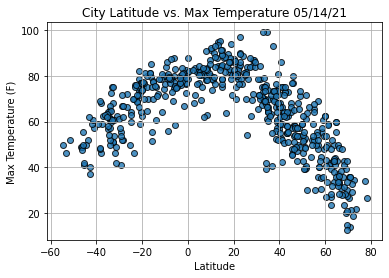

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidth=1, marker='o',
           alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

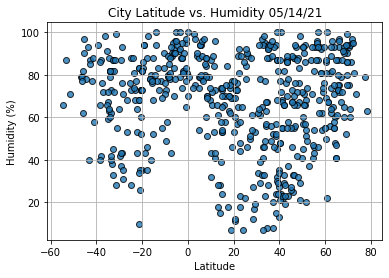

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidth=1, marker='o',
           alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

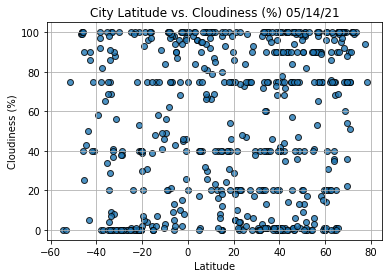

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

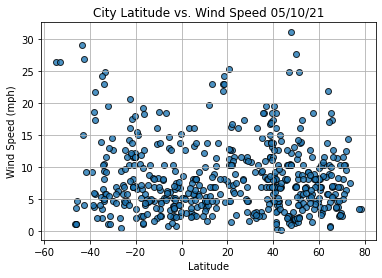

In [61]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [21]:
index3 = city_data_df.loc[3]
index3

City                 Punta Arenas
Country                        CL
Date          2021-05-14 19:38:11
Lat                        -53.15
Max Temp                     46.4
Humidity                       87
Cloudiness                      0
Wind Speed                   8.05
Name: 3, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
1,Homer,US,2021-05-14 19:38:10,59.6425,48.00,76,1,6.91
4,Bakaly,RU,2021-05-14 19:38:11,55.1789,65.48,54,41,8.23
5,Lingdong,CN,2021-05-14 19:38:11,46.5669,58.59,88,100,14.29
6,Isiro,CD,2021-05-14 19:38:12,2.7739,67.96,99,100,1.10
8,Leh,IN,2021-05-14 19:38:12,34.1667,39.49,56,60,5.55


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

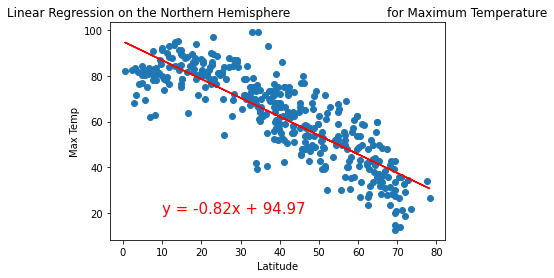

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,20))

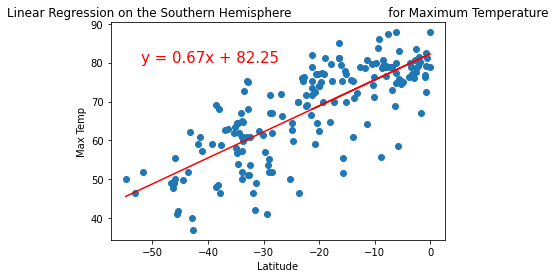

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-52,80))

In [27]:
linregress(x_values, y_values)

LinregressResult(slope=0.668433064579778, intercept=82.24787697399304, rvalue=0.7706857887166121, pvalue=7.139052586985775e-37, stderr=0.04130858265858144)

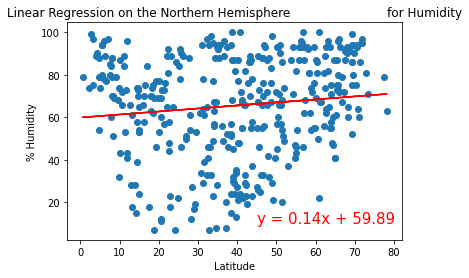

In [28]:
# Linear regression (for Humidity) on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity', '% Humidity',(45,10))

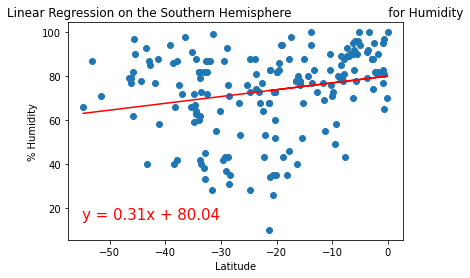

In [29]:
# Linear regression (for Humidity) on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Humidity', '% Humidity',(-55,15))

In [30]:
linregress(x_values, y_values)

LinregressResult(slope=0.3097080581638957, intercept=80.03775846803615, rvalue=0.2260474794740518, pvalue=0.002214902715023094, stderr=0.09975556317613818)

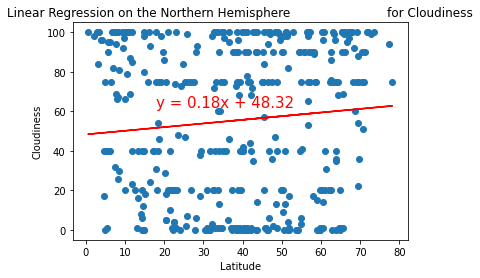

In [31]:
# Linear regression (for Cloudiness) on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Cloudiness", 'Cloudiness',(18,62))

In [32]:
linregress(x_values, y_values)

LinregressResult(slope=0.1845492831049193, intercept=48.31856867463214, rvalue=0.09493791653265009, pvalue=0.06413956309763962, stderr=0.09940013951379416)

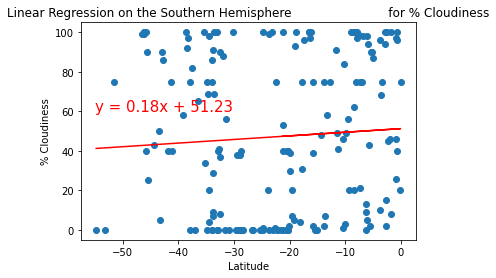

In [34]:
# Linear regression (for cloudiness) on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,60))

In [35]:
linregress(x_values, y_values)

LinregressResult(slope=0.18271852191354315, intercept=51.234174723967165, rvalue=0.06420876222946531, pvalue=0.39048269888070797, stderr=0.21225829057429743)

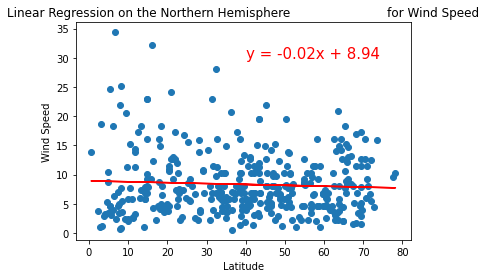

In [41]:
# Linear regression (for Wind Speed) on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

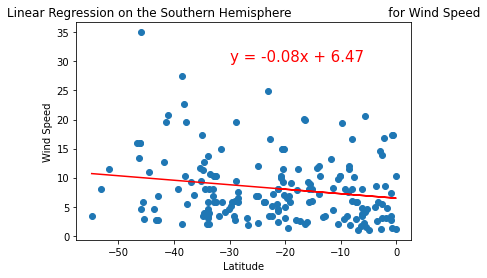

In [43]:
# Linear regression (for Wind Speed) on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,30))

In [44]:
linregress(x_values, y_values)

LinregressResult(slope=-0.07721856738954548, intercept=6.466341523882972, rvalue=-0.18635336249328133, pvalue=0.01201168406357813, stderr=0.030428667940751428)